# 项目：从IMDb电影数据中调查影响票房的因素

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

本数据集中包含 1 万条电影信息, 信息来源为[“电影数据库”（TMDb，The Movie Database）](https://www.kaggle.com/tmdb/tmdb-movie-metadata), 包括用户评分和票房. “_adj”结尾的最后两列表示考虑了通货膨胀之后的相关电影的预算和收入(以2010年美元的价值来计算).

此项目从这些数据中探究票房高的电影有哪些特点.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 数据清理

- 查看数据信息

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

- 可以看出imdb_id, cast, homepage等列存在空值，而imdb_id, homepage, tagline, production_companies与我们要研究的问题无关，决定把他们剔除

In [4]:
df.drop(['imdb_id', 'homepage', 'tagline', 'production_companies'], axis =1, inplace =True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


- 检查和删除冗余值

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

- 检查和处理空值

In [7]:
df.isnull().sum()

id                   0
popularity           0
budget               0
revenue              0
original_title       0
cast                76
director            44
keywords          1493
overview             4
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

cast, director, overview, genres, keywords列存在空值，将有空值的行删除

In [8]:
df.dropna(inplace = True)
df.shape, df.isnull().sum()

((9305, 17),
 id                0
 popularity        0
 budget            0
 revenue           0
 original_title    0
 cast              0
 director          0
 keywords          0
 overview          0
 runtime           0
 genres            0
 release_date      0
 vote_count        0
 vote_average      0
 release_year      0
 budget_adj        0
 revenue_adj       0
 dtype: int64)

- 查看数据描述性统计信息

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9305.000000,9305.000000,9.305000e+03,9.305000e+03,9305.000000,9305.000000,9305.000000,9305.000000,9.305000e+03,9.305000e+03
mean,58328.065449,0.708037,1.655561e+07,4.590598e+07,103.425363,247.652552,6.000441,2000.418377,1.992062e+07,5.930109e+07
std,86713.657879,1.063377,3.269047e+07,1.250587e+08,28.357510,616.042315,0.909991,13.068920,3.619198e+07,1.545479e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10001.000000,0.231003,0.000000e+00,0.000000e+00,91.000000,19.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00
50%,17182.000000,0.422711,3.500000e+05,0.000000e+00,100.000000,47.000000,6.100000,2005.000000,5.082002e+05,0.000000e+00
75%,58492.000000,0.790976,2.000000e+07,3.378816e+07,113.000000,181.000000,6.600000,2011.000000,2.579055e+07,4.651584e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


budget, revenue, runtime列存在0值，这显然是不合理的，把这些行剔除	

In [11]:
#创建一个删除0值的函数
def delete_zero(df_column):
    df_column.replace(0, np.nan, inplace=True)
    return df.dropna(inplace = True)

In [12]:
delete_zero(df['revenue'])
delete_zero(df['budget'])
delete_zero(df['runtime'])

- 查看数据处理后的情况

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3713 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3713 non-null   int64  
 1   popularity      3713 non-null   float64
 2   budget          3713 non-null   float64
 3   revenue         3713 non-null   float64
 4   original_title  3713 non-null   object 
 5   cast            3713 non-null   object 
 6   director        3713 non-null   object 
 7   keywords        3713 non-null   object 
 8   overview        3713 non-null   object 
 9   runtime         3713 non-null   int64  
 10  genres          3713 non-null   object 
 11  release_date    3713 non-null   object 
 12  vote_count      3713 non-null   int64  
 13  vote_average    3713 non-null   float64
 14  release_year    3713 non-null   int64  
 15  budget_adj      3713 non-null   float64
 16  revenue_adj     3713 non-null   float64
dtypes: float64(6), int64(4), object(

In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3713.000000,3713.000000,3.713000e+03,3.713000e+03,3713.000000,3713.000000,3713.000000,3713.000000,3.713000e+03,3.713000e+03
mean,39073.569620,1.216576,3.779881e+07,1.104373e+08,109.452195,542.698896,6.182009,2001.114193,4.501210e+07,1.408004e+08
std,66964.586285,1.494757,4.259186e+07,1.787857e+08,19.931157,892.043928,0.791485,11.342693,4.513731e+07,2.188435e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.861934e+00
25%,5551.000000,0.475609,1.000000e+07,1.456788e+07,96.000000,76.000000,5.700000,1995.000000,1.355785e+07,1.960260e+07
50%,11058.000000,0.820730,2.500000e+07,4.708899e+07,106.000000,214.000000,6.200000,2004.000000,3.049201e+07,6.463986e+07
75%,37931.000000,1.405588,5.000000e+07,1.287983e+08,119.000000,591.000000,6.700000,2010.000000,6.157441e+07,1.686037e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


- 可以看出经过处理后的数据没有空值和0值，可以进行下一步的分析了

<a id='eda'></a>
## 探索性数据分析

### 影响票房的因素有哪些？
- 做出散点图，探究票房与预算，热度，评分，电影时长之间的相关性

In [15]:
def plot(in_variable):
    return df.plot(x=in_variable, y='revenue', kind='scatter')

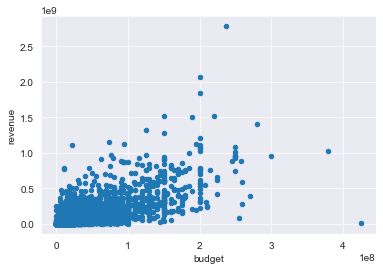

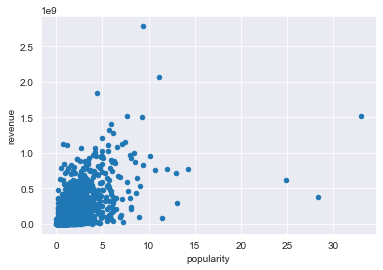

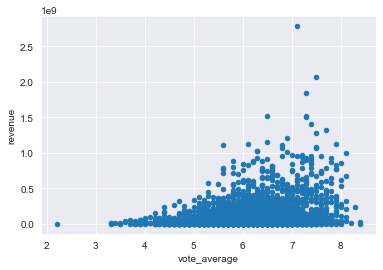

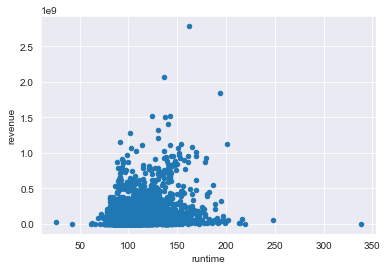

In [16]:
plot('budget')
plot('popularity')
plot('vote_average')
plot('runtime')

In [17]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.196978,-0.019807,0.002394,-0.033934,0.117973,0.001209,0.487253,-0.117270,-0.084097
popularity,0.196978,1.000000,0.443843,0.613116,0.213422,0.778301,0.317671,0.179832,0.395075,0.543436
budget,-0.019807,0.443843,1.000000,0.687146,0.260791,0.556417,0.021451,0.277284,0.958039,0.529909
revenue,0.002394,0.613116,0.687146,1.000000,0.249329,0.753785,0.227186,0.146067,0.655574,0.899834
runtime,-0.033934,0.213422,0.260791,0.249329,1.000000,0.274185,0.349873,-0.113703,0.335573,0.280020
vote_count,0.117973,0.778301,0.556417,0.753785,0.274185,1.000000,0.388935,0.215038,0.496238,0.652438
vote_average,0.001209,0.317671,0.021451,0.227186,0.349873,0.388935,1.000000,-0.131349,0.033261,0.266968
release_year,0.487253,0.179832,0.277284,0.146067,-0.113703,0.215038,-0.131349,1.000000,0.083394,-0.099250
budget_adj,-0.117270,0.395075,0.958039,0.655574,0.335573,0.496238,0.033261,0.083394,1.000000,0.566859
revenue_adj,-0.084097,0.543436,0.529909,0.899834,0.280020,0.652438,0.266968,-0.099250,0.566859,1.000000


- 预算和热度与票房相关性较大, 相关系数分别为0.687146, 0.613116; 
- 而评分与票房的相关性较小, 相关系数为0.227186; 
- 电影时长与票房的相关性也较小, 相关系数为0.249329.

### 预算对票房的影响

- 首先将票房数据分成四组, 分别是'low', 'medium', 'mod_high', 'high'以便分组进行对比

In [18]:
# 获取 最小值, 第一四分位数, 中位数, 第三四分位数, 最大值
df['revenue'].describe()

count    3.713000e+03
mean     1.104373e+08
std      1.787857e+08
min      2.000000e+00
25%      1.456788e+07
50%      4.708899e+07
75%      1.287983e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [19]:
# 创建分组时的边缘
bin_edges = [2.000000e+00, 1.456788e+07, 4.708899e+07, 1.287983e+08, 2.781506e+09]

In [20]:
# 创建分组标签
bin_names = ['low', 'medium', 'mod_high', 'high'] # 每个票房水平的名字

In [21]:
# 创建票房水平列
df['revenue_levels'] = pd.cut(df['revenue'], bin_edges, labels=bin_names)

# 检查是否添加成功
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,high
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,high
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,high
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,high
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,high


In [22]:
# 获取每个票房水平下预算的平均值
df.groupby('revenue_levels')['budget'].mean()

revenue_levels
low         1.250293e+07
medium      2.240628e+07
mod_high    3.644970e+07
high        7.985990e+07
Name: budget, dtype: float64

- 当票房水平越高时, 该票房水平下预算的平均值越大. 
- 即高票房电影的一个特点是预算高

#### 数据趋势
- 绘制最近五年票房与预算的柱状图

In [23]:
#选择最近5年
years =[2011, 2012, 2013, 2014, 2015]
#创建用于可视化的包含最近5年数据的pandas dataframe
df_trend = pd.DataFrame()
for year in years:
    df_col = df.query('release_year == "%s"' % year) 
    df_trend = df_trend.append(df_col) 
df_trend.shape

(818, 18)

In [24]:
#对发行年份和票房水平分组得到用于可视化的dataframe
df_plot = df_trend.groupby(['release_year','revenue_levels']).mean()
df_plot

id  popularity        budget  \
release_year revenue_levels                                            
2011         low              62813.280702    0.573714  1.061692e+07   
             medium           57921.621622    0.905711  2.345098e+07   
             mod_high         50531.926829    1.273682  3.779756e+07   
             high             55111.983051    2.005705  8.968644e+07   
2012         low              94467.717949    0.619720  1.201847e+07   
             medium           75631.407407    0.931343  2.821444e+07   
             mod_high         76996.766667    1.121762  3.123333e+07   
             high             66853.140000    2.673310  1.056300e+08   
2013         low             157371.205128    0.659112  1.164674e+07   
             medium          124882.142857    0.926278  2.038571e+07   
             mod_high        119570.279070    1.423360  4.140698e+07   
             high             95998.510638    2.564423  1.114043e+08   
2014         low             224704.414634    1.101767  8.240683e+06   
             medium          207008.193548    1.262031  1.716129e+07   
             mod_high        203845.606061    2.367151  3.841515e+07   
             high            158742.500000    4.585398  9.589444e+07   
2015         low             266254.027778    0.973298  1.118188e+07   
             medium          272956.466667    1.911229  1.983433e+07   
             mod_high        261792.139535    1.987291  3.079302e+07   
             high            213040.478261    5.987518  1.043283e+08   

                                  revenue     runtime   vote_count  \
release_year revenue_levels                                          
2011         low             3.565452e+06  101.298246   114.210526   
             medium          2.992111e+07  101.243243   259.729730   
             mod_high        8.314541e+07  110.195122   563.390244   
             high            3.108554e+08  111.237288  1382.016949   
2012         low             5.176844e+06  101.179487   142.641026   
             medium          3.176652e+07  103.259259   527.925926   
             mod_high        8.023993e+07  104.066667   524.033333   
             high            4.091647e+08  117.740000  2469.080000   
2013         low             4.304485e+06  100.410256   194.307692   
             medium          2.714004e+07  108.942857   532.657143   
             mod_high        8.659743e+07  110.604651   986.697674   
             high            4.020458e+08  116.021277  2327.085106   
2014         low             4.595507e+06  103.780488   353.512195   
             medium          3.074392e+07  108.967742   448.225806   
             mod_high        8.421591e+07  106.878788   780.757576   
             high            3.682283e+08  115.629630  2099.555556   
2015         low             4.703007e+06  107.138889   202.666667   
             medium          3.202711e+07  108.600000   569.933333   
             mod_high        8.038429e+07  107.720930   699.465116   
             high            4.677970e+08  119.804348  2178.652174   

                             vote_average    budget_adj   revenue_adj  
release_year revenue_levels                                            
2011         low                 6.063158  1.029202e+07  3.456342e+06  
             medium              6.035135  2.273334e+07  2.900546e+07  
             mod_high            6.102439  3.664088e+07  8.060100e+07  
             high                6.230508  8.694186e+07  3.013426e+08  
2012         low                 5.441026  1.141448e+07  4.916678e+06  
             medium              5.985185  2.679651e+07  3.017007e+07  
             mod_high            6.086667  2.966368e+07  7.620742e+07  
             high                6.364000  1.003215e+08  3.886018e+08  
2013         low                 5.930769  1.090173e+07  4.029142e+06  
             medium              6.068571  1.908171e+07  2.540399e+07  
             mod_high            6.313953  3.87583

##### 创建一个可视化函数, 将最近五年数据可视化以便于分析趋势

In [25]:
def visuals(in_variable):
    pos = np.arange(len(df_plot.query('revenue_levels =="low"'))) # 组的 x 坐标位置
    width = 0.2 # 条柱的宽度

    # 绘制条柱
    fig, ax = plt.subplots(figsize=(10,5))
    plt.bar(pos, df_plot.query('revenue_levels =="low"')[in_variable], width,  alpha=0.5, color='#EE3224', label= 'low') 
    plt.bar([p + width for p in pos], df_plot.query('revenue_levels =="medium"')[in_variable],width, alpha=0.5, color='#F78F1E', label='medium')
    plt.bar([p + width*2 for p in pos], df_plot.query('revenue_levels =="mod_high"')[in_variable], width, alpha=0.5, color='#FFC222', label='mod_high')
    plt.bar([p + width*3 for p in pos], df_plot.query('revenue_levels =="high"')[in_variable], width, alpha=0.5, color='#4fb427', label='high')

    # 标题和标签
    ax.set_ylabel(in_variable) # y 坐标刻度标签
    ax.set_title('{} in Different Revenue Levels in Recent Five Years'.format(in_variable.title())) 


    ax.set_xticks([p + 1.5 * width for p in pos])
    ax.set_xticklabels([2011,2012,2013,2014,2015]) # x 坐标刻度标签

    plt.legend()

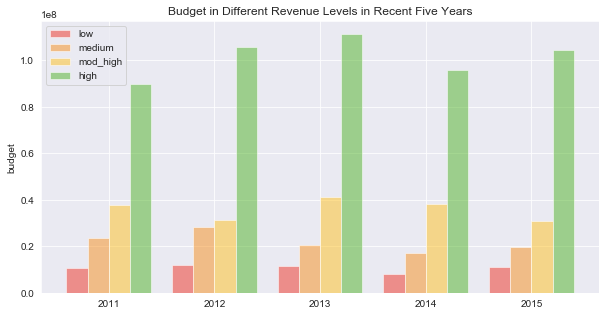

In [26]:
visuals('budget')

- 近五年的数据表明, 高票房电影的一个特点是预算高.
- 2011至2013年电影预算逐年增加, 但在2014年减少, 2015年再次增加.

### 热度对票房的影响

In [27]:
# 获取每个票房水平下热度的平均值
df.groupby('revenue_levels')['popularity'].mean()

revenue_levels
low         0.553593
medium      0.794361
mod_high    1.160431
high        2.358378
Name: popularity, dtype: float64

- 当票房水平越高时, 该票房水平下热度的平均值越大.
- 即高票房电影的另一个特点是热度高.

#### 数据趋势
- 绘制最近五年票房与热度的柱状图

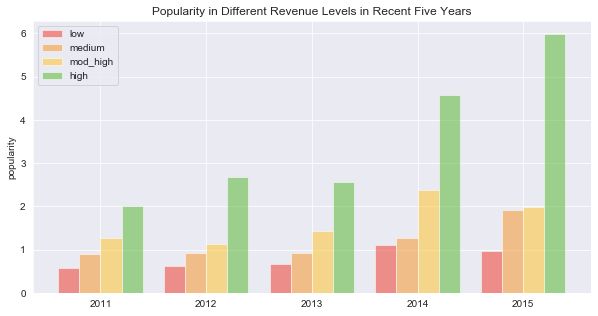

In [28]:
visuals('popularity')

- 近五年的数据表明, 高票房电影的另一个特点是热度高.
- 近五年来电影热度呈增长趋势.

### 评分对票房的影响

In [29]:
# 获取每个票房水平下评分的平均值
df.groupby('revenue_levels')['vote_average'].mean()

revenue_levels
low         6.000324
medium      6.113455
mod_high    6.202802
high        6.410668
Name: vote_average, dtype: float64

- 数据显示高票房电影的评分较高, 但各个票房水平的平均评分相差很小.
- 高票房电影的特点不包括评分高.

#### 数据趋势
- 绘制最近五年票房与评分的柱状图

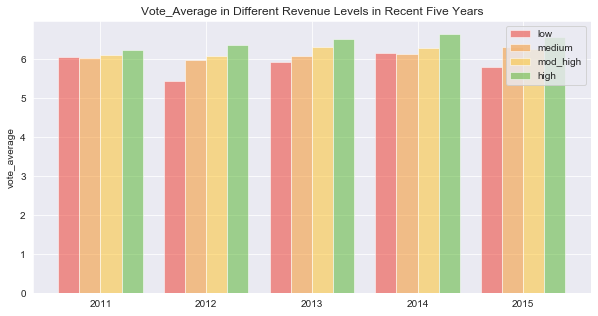

In [30]:
visuals('vote_average')

- 从近五年数据中可以看出, 不同票房水平下评分相差不大, 故高票房电影的特点不包括评分高.
- 近五年来电影评分并没有显著增长或减少, 表明人们认为最近的电影不一定比几年前的好

### 电影时长对票房的影响

In [31]:
# 获取每个票房水平下电影时长的平均值
df.groupby('revenue_levels')['runtime'].mean()

revenue_levels
low         104.019417
medium      107.358450
mod_high    110.153017
high        116.290948
Name: runtime, dtype: float64

- 数据显示高票房电影的时长较长, 但各个票房水平的平均时长相差很小.
- 高票房电影的特点不包括电影时间长.

#### 数据趋势
- 绘制最近五年票房与电影时长的柱状图

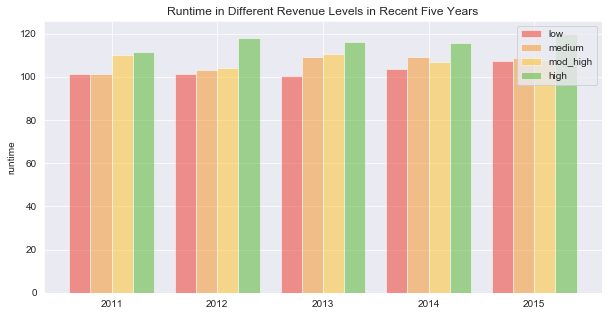

In [32]:
visuals('runtime')

- 从近五年数据中可以看出, 虽然近五年来高票房水平的平均电影时长比其他电影时间长，但是不同票房水平下电影时长相差不大, 故高票房电影的特点不包括电影时间长.
- 近五年来电影时长并无明显变化

<a id='conclusions'></a>
## 结论
通过对IMDb电影数据的分析,得出了以下结论:
1. 高票房电影的预算较高, 近五年来电影的预算总体上呈增长趋势.
2. 高票房电影的热度较高, 近五年来电影的热度呈增长趋势.
3. 高票房不意味着高评分, 近五年来电影的评分没有明显变化.
4. 高票房不意味着电影时间更长, 近五年来电影的时长没有明显变化.

本次数据分析存在局限性, 首先是数据中最新的是2015年的数据, 距今已过去5年, 结论中的"近五年来"指的是2011至2015年, 数据的时效性不好; 其次是由于删除了预算或者票房缺失的行, 清洗后的数据量与原数据量相比少了很多, 得出的结论可能造成误差.